In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

RANDOM_SEED = 6 

In [26]:
train_df = pd.read_csv("data/Traning_Data.csv")
test_df = pd.read_csv("data/Test_Data.csv")

In [27]:
train_df.head()

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
0,619,2,50,12500,98,1
1,664,0,13,3250,28,1
2,441,1,16,4000,35,1
3,160,2,20,5000,45,1
4,358,1,24,6000,77,0


In [28]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Unnamed: 0                   576 non-null    int64
 1   Months since Last Donation   576 non-null    int64
 2   Number of Donations          576 non-null    int64
 3   Total Volume Donated (c.c.)  576 non-null    int64
 4   Months since First Donation  576 non-null    int64
 5   Made Donation in March 2007  576 non-null    int64
dtypes: int64(6)
memory usage: 27.1 KB


In [29]:
test_df.head()

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation
0,659,2,12,3000,52
1,276,21,7,1750,38
2,263,4,1,250,4
3,303,11,11,2750,38
4,83,4,12,3000,34


In [30]:
features = train_df.drop(['Made Donation in March 2007'],axis = 1)
labels = train_df[['Made Donation in March 2007']]

X_train, X_eval, y_train, y_eval = train_test_split(
    features,
    labels,
    test_size=0.2,
    shuffle=True,
    stratify=labels,
    random_state=RANDOM_SEED
)


In [31]:
# Checking for any missing data
X_train.isnull().sum()

Unnamed: 0                     0
Months since Last Donation     0
Number of Donations            0
Total Volume Donated (c.c.)    0
Months since First Donation    0
dtype: int64

In [32]:
X_eval.isnull().sum()

Unnamed: 0                     0
Months since Last Donation     0
Number of Donations            0
Total Volume Donated (c.c.)    0
Months since First Donation    0
dtype: int64

In [33]:
test_df.isnull().sum()

Unnamed: 0                     0
Months since Last Donation     0
Number of Donations            0
Total Volume Donated (c.c.)    0
Months since First Donation    0
dtype: int64

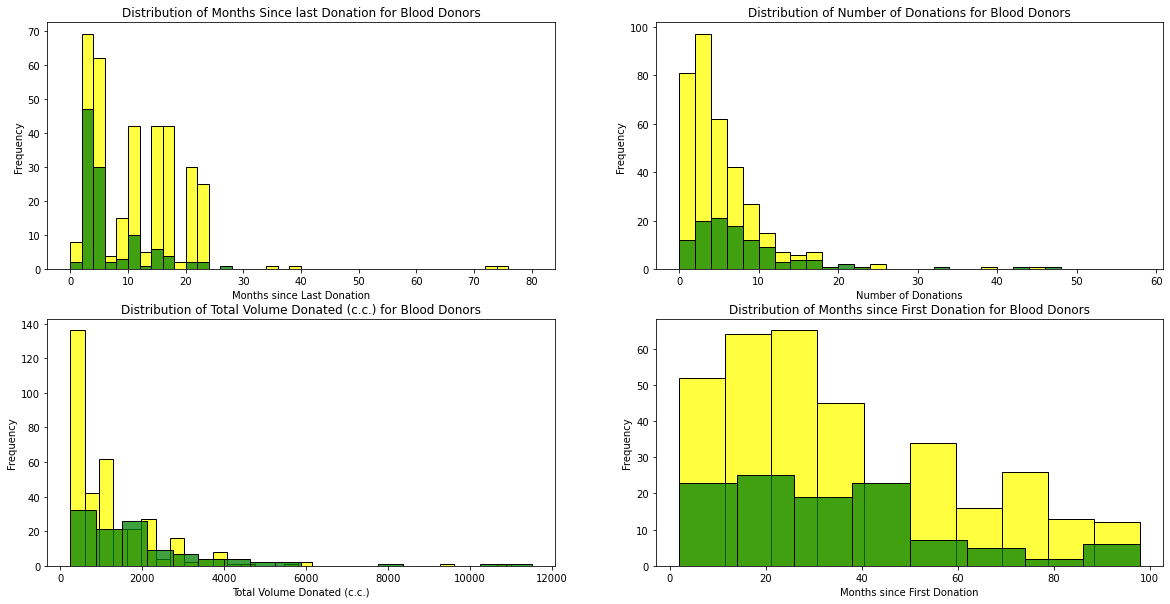

In [34]:
# Visualising data
plt.figure(figsize = (20, 10))
plt.subplot(2, 2, 1)
sns.histplot(X_train[y_train.values == 0]['Months since Last Donation'], 
             bins = range(0, 81, 2), color = 'yellow')
plt.ylabel('Frequency')
plt.title('Distribution of Months Since last Donation for Non-blood Donors')

sns.histplot(X_train[y_train.values == 1]['Months since Last Donation'], 
             bins = range(0, 81, 2), color = 'green')
plt.ylabel('Frequency')
plt.title('Distribution of Months Since last Donation for Blood Donors')

plt.subplot(2, 2, 2)
sns.histplot(X_train[y_train.values == 0]['Number of Donations'], 
             bins = range(0, 60, 2), color = 'yellow')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Donations for Non-blood Donors')

sns.histplot(X_train[y_train.values == 1]['Number of Donations'], 
             bins = range(0, 60, 2), color = 'green')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Donations for Blood Donors')

plt.subplot(2, 2, 3)
sns.histplot(X_train[y_train.values == 0]['Total Volume Donated (c.c.)'], color = 'yellow')
plt.ylabel('Frequency')
plt.title('Distribution of Total Volume Donated (c.c.) for Non-blood Donors')

sns.histplot(X_train[y_train.values == 1]['Total Volume Donated (c.c.)'], color = 'green')
plt.ylabel('Frequency')
plt.title('Distribution of Total Volume Donated (c.c.) for Blood Donors')

plt.subplot(2, 2, 4)
sns.histplot(X_train[y_train.values == 0]['Months since First Donation'], color = 'yellow')
plt.ylabel('Frequency')
plt.title('Distribution of Months since First Donation for Non-blood Donors')

sns.histplot(X_train[y_train.values == 1]['Months since First Donation'], color = 'green')
plt.ylabel('Frequency')
plt.title('Distribution of Months since First Donation for Blood Donors')

plt.show()

The results show blood donors who have frequently donated blood in the past and ones who have donated within 3-6 months are much more likely to donate blood. 

In [43]:
X_train.loc[:,'Average Donation per Month'] = (X_train['Total Volume Donated (c.c.)']/
                                         X_train['Months since First Donation'])

X_eval.loc[:,'Average Donation per Month'] = X_eval['Total Volume Donated (c.c.)']/X_eval['Months since First Donation']
test_df.loc[:,'Average Donation per Month'] = test_df['Total Volume Donated (c.c.)']/test_df['Months since First Donation']

In [45]:
X_train.loc[:,'Waiting Time'] = ((X_train['Months since First Donation'] - X_train['Months since Last Donation'])
                           /X_train['Number of Donations'])

X_eval.loc[:,'Waiting Time'] = ((X_eval['Months since First Donation'] - X_eval['Months since Last Donation'])
                        /X_eval['Number of Donations'])

test_df.loc[:,'Waiting Time'] = ((test_df['Months since First Donation'] - test_df['Months since Last Donation'])
                          /test_df['Number of Donations'])

In [52]:
X_train.loc[:,'Frequent Donor'] = (X_train['Number of Donations'] >= 5)

X_eval.loc[:,'Frequent Donor'] = (X_eval['Number of Donations'] >= 5)

test_df.loc[:,'Frequent Donor'] = (test_df['Number of Donations'] >= 5)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [58]:
numericFeatures = ['Months since Last Donation', 'Number of Donations', 
                   'Average Donation per Month', 'Waiting Time', 'Months since First Donation']

scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train[numericFeatures]))
X_eval_scaled = pd.DataFrame(scaler.transform(X_eval[numericFeatures]))
test_df_scaled = pd.DataFrame(scaler.transform(test_df[numericFeatures]))


factorVar = ['Frequent Donor']

le = LabelEncoder()

for i in factorVar:
    X_train_scaled[i] = le.fit_transform(X_train[i])
    X_eval_scaled[i]  = le.transform(X_eval[i])
    test_df_scaled[i] = le.transform(test_df[i])
    
    
logregr = LogisticRegressionCV(cv = 5, random_state=12, scoring ='neg_log_loss')
logregr = logregr.fit(X_train_scaled, y_train['Made Donation in March 2007'])

y_eval_logregr = logregr.predict_proba(X_eval_scaled)[:, 1]

In [59]:
X_total = pd.concat([pd.DataFrame(X_train_scaled), pd.DataFrame(X_eval_scaled)])
y_total = pd.concat([y_train, y_eval]).values

final_model = logregr.fit(X_total, y_total)
y_test = final_model.predict_proba(test_df_scaled)[:, 1]

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [60]:
print(y_test.mean(), train_df['Made Donation in March 2007'].values.mean())

0.23777052815398136 0.23958333333333334
